# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

In [1]:
import IPython
# IPython.display.Image("what is pytorch.png")

#        Пример обучения нейронной сети в numpy

In [2]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 26953410.012758486
1 22435616.248325415
2 20926787.129045587
3 19766574.16994752
4 17572603.213484347
5 14251021.232893158
6 10450376.241645044
7 7106844.2398616085
8 4614089.092574674
9 2976613.001742042
10 1961762.468488101
11 1348957.2949380805
12 974840.7350587301
13 740174.406101784
14 586283.6585879397
15 480146.24848356994
16 403064.2482466382
17 344469.85105863813
18 298198.0775025572
19 260611.35734489808
20 229413.98198922418
21 203156.6123708564
22 180749.89804074576
23 161439.13706686953
24 144683.94271619973
25 130055.2290274319
26 117239.49862756915
27 105961.31300994444
28 95990.04029520054
29 87141.84183650871
30 79267.64868630935
31 72238.36154292559
32 65946.45669644236
33 60303.993127699796
34 55233.668192707264
35 50666.23100571648
36 46545.39340156074
37 42819.164956889275
38 39440.415287406446
39 36371.32674316371
40 33580.324806491844
41 31037.129006527786
42 28722.760631628935
43 26608.6250502165
44 24674.484002274206
45 22903.882657360708
46 21279.39876702939

389 0.020233693718987603
390 0.01956398591848302
391 0.0189164001022013
392 0.018290170444378667
393 0.01768485615133123
394 0.017099627812913434
395 0.016533772821434013
396 0.015986792429605802
397 0.015457906807178406
398 0.014946712092052145
399 0.014452373894962393
400 0.013974414143455106
401 0.013512325867838336
402 0.013065683347575604
403 0.01263388158277947
404 0.01221630436201885
405 0.011812627603823523
406 0.011422315690334077
407 0.011044939098942065
408 0.010680057343086776
409 0.010327269068069007
410 0.00998617910382521
411 0.009656368702259215
412 0.00933752732323755
413 0.009029214344034892
414 0.00873108127734441
415 0.0084428416520107
416 0.008164154940454586
417 0.007894670878165581
418 0.0076341571247572305
419 0.007382382077879057
420 0.007138773507828992
421 0.006903268072641517
422 0.0066755528592565535
423 0.006455332276025191
424 0.006242416871411326
425 0.006036548558162295
426 0.0058374956617576294
427 0.005645036595856991
428 0.005458898179913789
429 0.00

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [3]:
import torch

In [4]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [5]:
x

tensor([[7.5244e+28, 1.2708e+31, 1.6931e+22],
        [1.7338e+25, 1.9364e+31, 1.7589e+22],
        [7.1856e+22, 1.3563e-19, 1.8578e-01],
        [5.0750e+31, 3.1770e+30, 1.1869e+27],
        [1.7836e+31, 4.6534e+33, 1.7338e+25]])

In [6]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [7]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [8]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [9]:
x

tensor([[ 1.0367, -1.1935,  0.4636],
        [-0.0781, -0.6571,  0.1365],
        [ 0.5422,  0.4521,  1.3611],
        [-0.6273,  0.4333, -0.3247],
        [ 0.1638, -0.7217,  1.0714]])

In [10]:
x.shape

torch.Size([5, 3])

In [11]:
x.size()

torch.Size([5, 3])

In [12]:
y = torch.rand(5, 3)

In [13]:
y

tensor([[0.3100, 0.9762, 0.2239],
        [0.4877, 0.1320, 0.7870],
        [0.8653, 0.1014, 0.0735],
        [0.5493, 0.5277, 0.9994],
        [0.7210, 0.2370, 0.4150]])

In [14]:
# Первый способ сложить 2 тензора
x + y

tensor([[ 1.3467, -0.2173,  0.6875],
        [ 0.4096, -0.5251,  0.9235],
        [ 1.4075,  0.5535,  1.4347],
        [-0.0780,  0.9610,  0.6747],
        [ 0.8848, -0.4846,  1.4864]])

In [15]:
# Второй способ сложить 2 тензора
x.add(y)

tensor([[ 1.3467, -0.2173,  0.6875],
        [ 0.4096, -0.5251,  0.9235],
        [ 1.4075,  0.5535,  1.4347],
        [-0.0780,  0.9610,  0.6747],
        [ 0.8848, -0.4846,  1.4864]])

In [16]:
# А еще можно так:
torch.add(x, y)

tensor([[ 1.3467, -0.2173,  0.6875],
        [ 0.4096, -0.5251,  0.9235],
        [ 1.4075,  0.5535,  1.4347],
        [-0.0780,  0.9610,  0.6747],
        [ 0.8848, -0.4846,  1.4864]])

In [17]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

tensor([[ 1.3467, -0.2173,  0.6875],
        [ 0.4096, -0.5251,  0.9235],
        [ 1.4075,  0.5535,  1.4347],
        [-0.0780,  0.9610,  0.6747],
        [ 0.8848, -0.4846,  1.4864]])

In [18]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [19]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [20]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[ 1.5334, -0.6554,  0.7326, -2.2084],
        [ 0.7206,  1.0777, -0.4194, -0.0620],
        [-0.7034, -0.2546, -0.0579,  0.8967],
        [ 1.3596, -4.0273,  2.3916, -2.8330],
        [-0.5356,  0.3372, -0.2692,  0.3898]])

In [21]:
# для python 3

a @ b

tensor([[ 1.5334, -0.6554,  0.7326, -2.2084],
        [ 0.7206,  1.0777, -0.4194, -0.0620],
        [-0.7034, -0.2546, -0.0579,  0.8967],
        [ 1.3596, -4.0273,  2.3916, -2.8330],
        [-0.5356,  0.3372, -0.2692,  0.3898]])

In [22]:
device = torch.cuda.device(3)

In [23]:
torch.cuda.set_device(3)

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __dtype = torch.cuda.FloatTensor__

In [24]:
dtype = torch.FloatTensor
dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at /opt/conda/conda-bld/pytorch_1573049310284/work/aten/src/THC/THCGeneral.cpp:50

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [25]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
# В pytorch начиная с версии 1.0, Tensor может содержать в себе всю эту информацию
import torch
from torch.autograd import Variable
x = torch.ones(2, 2, requires_grad=True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [27]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [28]:
x.grad

In [29]:
# производная операции, которая породила переменную.
x.grad_fn

# Задаем граф вычислений: #

In [30]:
y = x + 2
z = y * y * 2
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [31]:
# Запускаем бэкпроп
out.backward()

In [32]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [33]:
out.grad == None

True

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)
__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __tensor.register_hook(print)__
или использовать __tensor.retain_grad()__

In [34]:
from __future__ import print_function
x = torch.ones(2, 2, requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [35]:
out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [36]:
v = torch.randn(3, requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

In [37]:
v.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [38]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

tensor([0.4892, 0.5365])

In [39]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [40]:
x = torch.ones(2, 2, requires_grad=True )
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [41]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



In [42]:
MyReLU()(torch.randn(2))

/opt/conda/conda-bld/pytorch_1573049310284/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


tensor([0.6526, 0.3554])

# Снова вернемся к исходной двухслойной сети

In [43]:
import torch

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = torch.randn(N, D_in, requires_grad=False).type(dtype)
y = torch.randn(N, D_out, requires_grad=False).type(dtype)


w1 = torch.randn(D_in, H, requires_grad=True).type(dtype)
w2 = torch.randn(H, D_out, requires_grad=True).type(dtype)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

0 36822324.0
1 33705928.0
2 34095180.0
3 31649794.0
4 24545298.0
5 15445358.0
6 8419904.0
7 4419799.0
8 2490172.25
9 1582143.75
10 1127728.875
11 870714.625
12 705514.75
13 587534.5625
14 497349.28125
15 425379.65625
16 366420.8125
17 317509.25
18 276574.6875
19 241972.40625
20 212490.78125
21 187272.4375
22 165551.875
23 146821.609375
24 130593.0546875
25 116481.1875
26 104163.359375
27 93368.7265625
28 83868.5
29 75485.4140625
30 68067.625
31 61489.40234375
32 55639.59375
33 50425.2109375
34 45768.640625
35 41601.24609375
36 37865.375
37 34508.14453125
38 31485.583984375
39 28762.1015625
40 26302.81640625
41 24079.705078125
42 22066.486328125
43 20240.892578125
44 18583.69140625
45 17077.181640625
46 15706.1953125
47 14457.044921875
48 13318.162109375
49 12278.875
50 11329.0419921875
51 10459.45703125
52 9662.826171875
53 8932.5283203125
54 8262.439453125
55 7647.20361328125
56 7081.76123046875
57 6561.7783203125
58 6083.12109375
59 5642.2451171875
60 5235.83251953125
61 4860.9189453

463 4.086687840754166e-05
464 4.0387803892372176e-05
465 3.9734935853630304e-05
466 3.915590787073597e-05
467 3.85813727916684e-05
468 3.812857539742254e-05
469 3.743498746189289e-05
470 3.700680463225581e-05
471 3.650387952802703e-05
472 3.602588549256325e-05
473 3.548673339537345e-05
474 3.52221068169456e-05
475 3.491493043839e-05
476 3.422205554670654e-05
477 3.3973235986195505e-05
478 3.3516807889100164e-05
479 3.319026291137561e-05
480 3.274045229773037e-05
481 3.253950853832066e-05
482 3.227299384889193e-05
483 3.178092447342351e-05
484 3.137946259812452e-05
485 3.1055147701408714e-05
486 3.065384953515604e-05
487 3.0350147426361218e-05
488 2.9915387131040916e-05
489 2.9451350201270543e-05
490 2.9064514819765463e-05
491 2.8740545531036332e-05
492 2.8503272915259004e-05
493 2.827408752636984e-05
494 2.7863636205438524e-05
495 2.7556341592571698e-05
496 2.7384761779103428e-05
497 2.7102778403786942e-05
498 2.6912028260994703e-05
499 2.6613099180394784e-05


# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequental`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [44]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

/home/waffpad/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 819.7227172851562
1 526.2084350585938
2 343.45611572265625
3 227.6781768798828
4 153.09274291992188
5 104.27668762207031
6 71.8517837524414
7 50.020694732666016
8 35.140594482421875
9 24.885740280151367
10 17.74850082397461
11 12.737410545349121
12 9.191696166992188
13 6.665533542633057
14 4.854745388031006
15 3.549699306488037
16 2.6045894622802734
17 1.9171785116195679
18 1.4152559041976929
19 1.0474860668182373
20 0.7771532535552979
21 0.5778689980506897
22 0.4305710196495056
23 0.321432888507843
24 0.240386500954628
25 0.1800767183303833
26 0.1351102739572525
27 0.10152296721935272
28 0.07639316469430923
29 0.05756067484617233
30 0.043426141142845154
31 0.032802514731884
32 0.0248069129884243
33 0.018781321123242378
34 0.014234539121389389
35 0.01079997792840004
36 0.008202273398637772
37 0.006235452834516764
38 0.0047448002733290195
39 0.0036137497518211603
40 0.0027548030484467745
41 0.0021018371917307377
42 0.0016049486584961414
43 0.0012265569530427456
44 0.000938122742809355

421 1.5595277890259607e-12
422 1.7107956761311383e-12
423 1.7809617712874481e-12
424 1.769748518738734e-12
425 1.5871931590208388e-12
426 1.5870647894836165e-12
427 1.6052863248752769e-12
428 1.6626848552483975e-12
429 1.6771177545685245e-12
430 1.656356584008034e-12
431 1.5415040121105616e-12
432 1.47700005437984e-12
433 1.545889393057831e-12
434 1.560100247773033e-12
435 1.6097133391859697e-12
436 1.530332392925271e-12
437 1.5638750060567586e-12
438 1.6435335080736135e-12
439 1.501758027828981e-12
440 1.4916411205170843e-12
441 1.5659150408645073e-12
442 1.4513955358744224e-12
443 1.392553715569289e-12
444 1.5071287317106052e-12
445 1.5123467799263435e-12
446 1.583067986594966e-12
447 1.4674937697314872e-12
448 1.3394121966062156e-12
449 1.3796022700976462e-12
450 1.4620918408272954e-12
451 1.5396409190973626e-12
452 1.4703630023607528e-12
453 1.5659532047809788e-12
454 1.3906767447682822e-12
455 1.336532555636094e-12
456 1.3267625930193927e-12
457 1.2898580857914621e-12
458 1.318168

In [45]:
loss_fn(model(x), y)

tensor(1.6834e-12, grad_fn=<MseLossBackward>)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [46]:
N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 838.1641235351562
1 823.4567260742188
2 808.8963623046875
3 794.4850463867188
4 780.2249755859375
5 766.1181030273438
6 752.1663818359375
7 738.37158203125
8 724.7352905273438
9 711.2589721679688
10 697.9440307617188
11 684.7916870117188
12 671.8031005859375
13 658.9791870117188
14 646.32080078125
15 633.8285522460938
16 621.5031127929688
17 609.3449096679688
18 597.3541870117188
19 585.5311889648438
20 573.8758544921875
21 562.3882446289062
22 551.068115234375
23 539.9151611328125
24 528.9290161132812
25 518.1091918945312
26 507.4549865722656
27 496.96575927734375
28 486.6407165527344
29 476.4789733886719
30 466.4796142578125
31 456.64154052734375
32 446.9637145996094
33 437.4449768066406
34 428.0840759277344
35 418.8797302246094
36 409.83062744140625
37 400.9354248046875
38 392.1926574707031
39 383.6008605957031
40 375.1585998535156
41 366.86431884765625
42 358.7164611816406
43 350.71343994140625
44 342.85369873046875
45 335.1355285644531
46 327.5574035644531
47 320.11761474609375


In [47]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [52]:
# Сохранение
def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [53]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [54]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

SyntaxError: invalid syntax (<ipython-input-54-5e57cb9843db>, line 4)

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). __PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


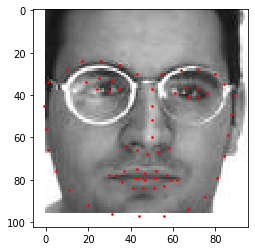

In [57]:
%matplotlib inline
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [58]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


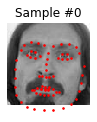

1 (96, 96) (68, 2)


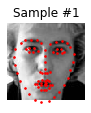

2 (96, 96) (68, 2)


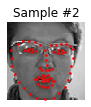

3 (96, 96) (68, 2)


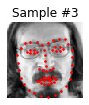

In [59]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [60]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

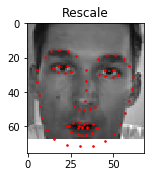

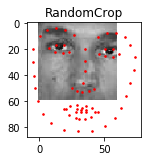

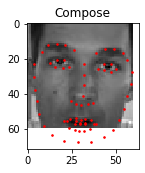

In [87]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [88]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


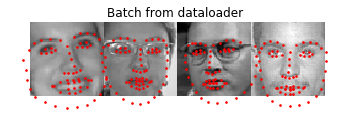

In [100]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [101]:
import pandas as pd

In [102]:
pd.read_csv("dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71
5,1001.jpeg,10,38,12,48,14,58,16,66,19,...,51,68,60,71,52,76,48,76,44,76
6,1002.jpeg,5,30,5,42,6,53,7,63,9,...,49,79,57,81,49,81,44,81,39,80
7,1003.jpeg,11,36,13,46,15,56,18,66,21,...,54,73,62,73,54,77,50,77,45,77
8,1004.jpeg,8,31,8,41,9,51,10,61,14,...,48,76,55,77,48,75,44,75,41,73
9,1005.jpeg,15,36,16,45,17,53,19,61,22,...,48,66,54,69,48,70,45,70,42,69


# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [103]:
x = torch.randn((2, 3), requires_grad=True)
a = torch.randn((3, 3), requires_grad=False)
with torch.autograd.profiler.profile() as prof:
    for _ in range(1000):
        y = (x @ a).norm()
        y.backward()

### Так же могут быть полезны утилиты ``cProfile``, ``torch.utils.bottleneck``,  ``snakeviz``